# Basic Python Data Visulization (matplotlib)

* 2-D plot
* 3-D plot

## 2-D plot

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

#### One-Dimensional Data Set

In [2]:
# got sample data
np.random.seed(10)
y=np.random.standard_normal(100)

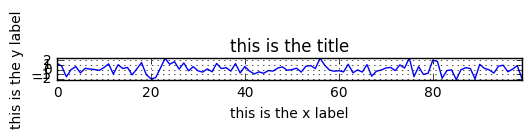

In [3]:
plt.plot(y)   
#since y is a ndarray, it would automatically use ndarray index as x axis
#otherwise can be used with plt.plot(range(len(y)),y) if y is not a ndarray
plt.grid(True)

## set x and y axis limits
plt.xlim(-1,20)
plt.ylim(np.min(y)-1,
         np.max(y)+1)

#Options for plt.axis
# Parameter           Description
# Empty               Returns current axis limits
# off                 Turns axis lines and labels off
# equal               Leads to equal scaling
# scaled              Equal scaling via dimension changes
# tight               Makes all data visible
# image               Makes all data visible
plt.axis('image')

plt.xlabel('this is the x label')
plt.ylabel('this is the y label')
plt.title('this is the title')

#### Two-Dimensional Data Set

In [4]:
# data set genertion
np.random.seed(10)
y = np.random.standard_normal((20,2)).cumsum(axis=0)

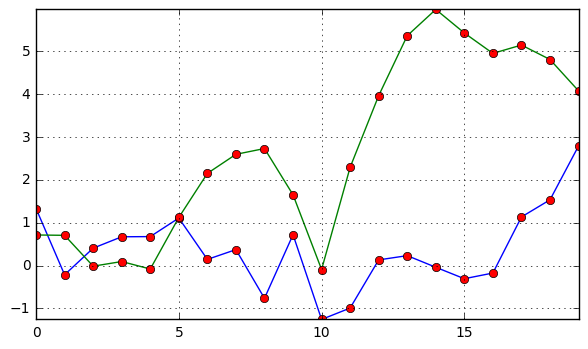

In [5]:
#plot two lines
plt.figure(figsize=(7,4))
plt.plot(y)
#plot two dotted lines
plt.grid(True)
plt.axis('tight')
plt.plot(y,'ro')

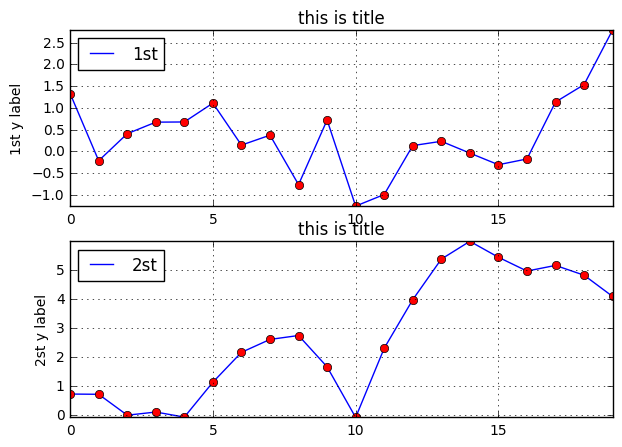

In [6]:
# use sub plot to presetn data
plt.figure(figsize=(7,5))
plt.subplot(211)
plt.plot(y[:,0],label='1st')
plt.plot(y[:,0],'ro')  # add point 
plt.grid(True)
plt.legend(loc=0)
plt.axis('tight')
plt.ylabel('1st y label')
plt.title('this is title')
plt.subplot(212)
plt.plot(y[:,1],label='2st')
plt.plot(y[:,1],'ro')  # add point 
plt.grid(True)
plt.legend(loc=0)
plt.axis('tight')
plt.ylabel('2st y label')
plt.title('this is title')

# subplot function take 3 integers as numrows, numcols, fignum

In [7]:
# scatter plot
y = np.random.standard_normal((1000,2))

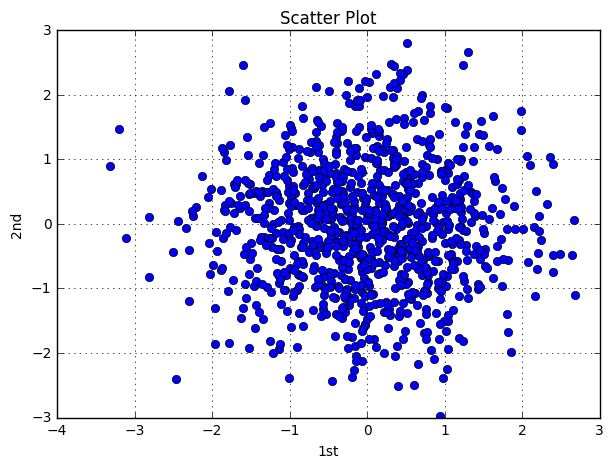

In [8]:
plt.figure(figsize=(7,5))
plt.plot(y[:,0],y[:,1], 'o')
plt.grid(True)
plt.xlabel('1st')
plt.ylabel('2nd')
plt.title('Scatter Plot')

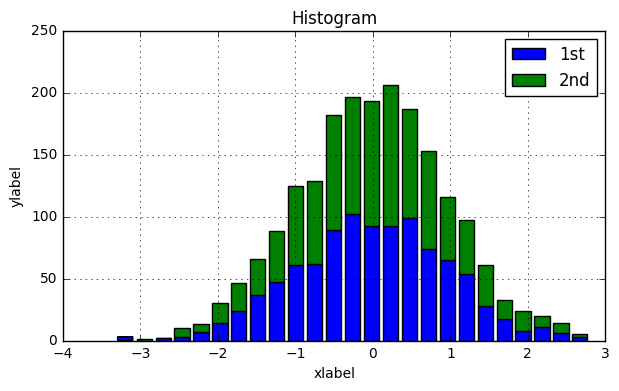

In [9]:
# histogram plot
plt.figure(figsize=(7,4))
plt.hist(y,label=['1st','2nd'],stacked=True, bins=25)
plt.grid(True)
plt.legend(loc=0)
plt.xlabel('xlabel')
plt.ylabel('ylabel')
plt.title('Histogram')


# function parameter for hist
# Parameter    Description
# x            list objects
# bins         number of bins
# range        lower and upper range of bins
# normed       norming such that integral value is 1
# weights      weights for every value in x
# log          log scale
# color        color
# stacked      stacks multiple data sets

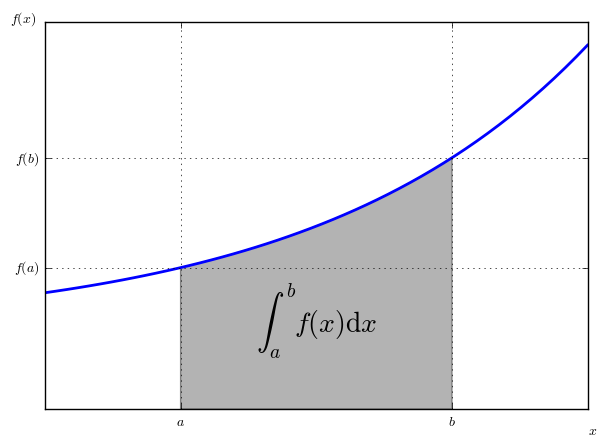

In [10]:
# mathmatical plot
from matplotlib.patches import Polygon

# first define function
def func(x):
    return 0.5 * np.exp(x) +1

#integral interval [0.5,1.5]
a=0.5
b=1.5
x = np.linspace(0,2)
y = func(x)

#plot function itself
fig, ax = plt.subplots(figsize=(7,5))
plt.plot(x,y,'b',linewidth=2)
plt.ylim(ymin=0)

#generate shaded area
Ix = np.linspace(a,b)
Iy=func(Ix)
verts=[(a,0)]+list(zip(Ix,Iy))+[(b,0)]
poly = Polygon(verts, facecolor='.7',edgecolor='.5')
ax.add_patch(poly)

# show mathmatic formula with LaTeX
plt.text(0.5*(a+b),1,r"$\int_a^b f(x)\mathrm{d}x$",
        horizontalalignment='center', fontsize=20)

plt.figtext(0.9,0.075,'$x$')
plt.figtext(0.075,0.9,'$f(x)$')
ax.set_xticks((a,b))
ax.set_xticklabels(('$a$','$b$'))
ax.set_yticks([func(a),func(b)])
ax.set_yticklabels(('$f(a)$','$f(b)$'))
plt.grid(True)


## 3-D plot

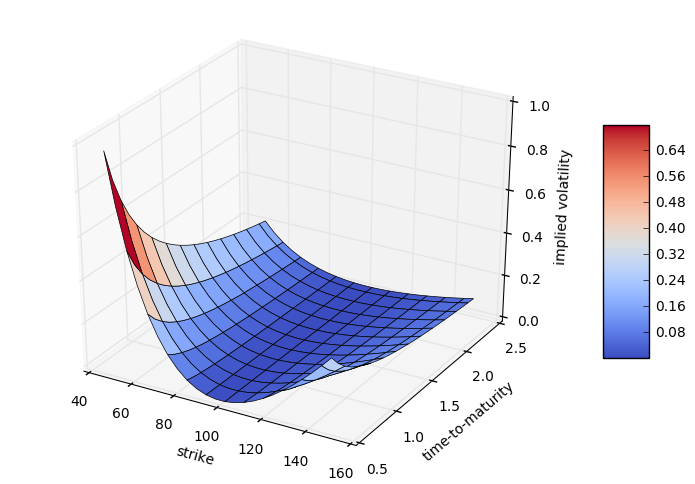

In [11]:
# data generation
strike = np.linspace(50,150,24)
ttm = np.linspace(0.5,2.5,24)
# convert both strike and ttm to 2-dimensional data
strike, ttm = np.meshgrid(strike,ttm)
# generate implied volatility
iv = (strike-100)**2/(100*strike)/ttm
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(9,6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(strike,ttm,iv,rstride=2,cstride=2,
                      cmap=plt.cm.coolwarm, linewidth=0.5,
                      antialiased=True)
ax.set_xlabel('strike')
ax.set_ylabel('time-to-maturity')
ax.set_zlabel('implied volatility')
fig.colorbar(surf, shrink=.5,aspect=5)